# Assessment Round 1                                                                   #by saif Abbas

# Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation

In [9]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [11]:
sns.set()

# Reading and Understanding the Data

In [12]:
bike= pd.read_csv(r"C:\Users\Saif\Downloads\daybyday.csv")

In [13]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
bike.shape

(730, 16)

In [15]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [16]:
bike['dteday'].dtype

dtype('O')

In [17]:
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')
bike['dteday'].dtype

dtype('<M8[ns]')

In [18]:
bike['year'] = pd.DatetimeIndex(bike['dteday']).year
bike['month'] = pd.DatetimeIndex(bike['dteday']).month

In [19]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [20]:
bike.drop(['yr','mnth'],axis=1,inplace=True)

In [21]:
bike.head()

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [22]:
bike.drop('holiday',axis=1,inplace=True)

In [23]:
bike.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [24]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


In [25]:
bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [26]:
bike.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


# Encoding the Labels & Visualization

In [27]:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(codes)

<AxesSubplot:xlabel='season', ylabel='count'>

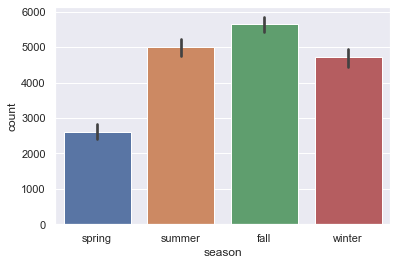

In [28]:
sns.barplot('season','count',data=bike)

In [29]:
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(codes)

<AxesSubplot:xlabel='weathersit', ylabel='count'>

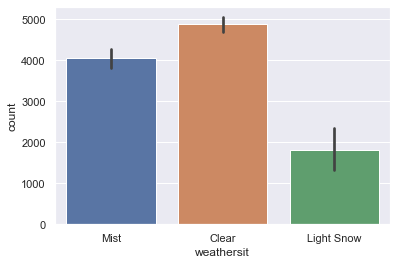

In [30]:
sns.barplot('weathersit','count',data=bike)

In [31]:
codes = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(codes)

<AxesSubplot:xlabel='workingday', ylabel='count'>

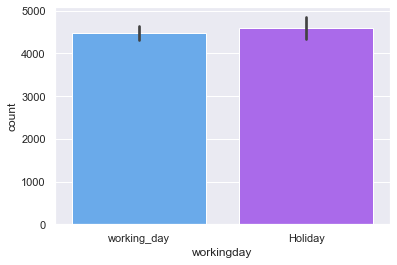

In [32]:
sns.barplot('workingday','count',data=bike,palette='cool')

In [33]:
codes = {2019:1,2018:0}
bike['year'] = bike['year'].map(codes)

<AxesSubplot:xlabel='year', ylabel='count'>

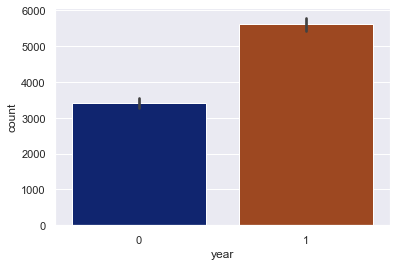

In [34]:
sns.barplot('year','count',data=bike,palette='dark')

In [35]:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['month'].map(codes)

<AxesSubplot:xlabel='month', ylabel='count'>

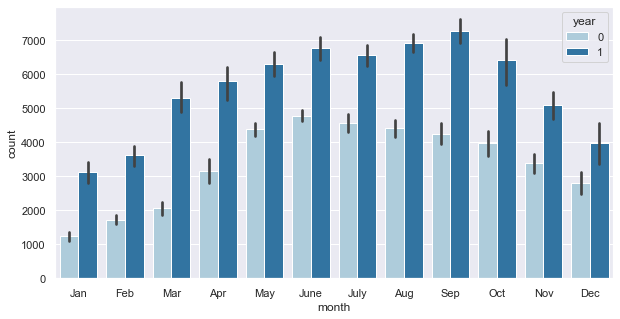

In [36]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='Paired')

In [37]:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)

<AxesSubplot:xlabel='weekday'>

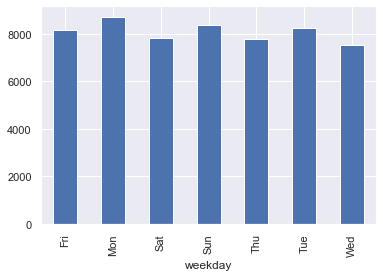

In [38]:
bike.groupby('weekday')['count'].max().plot(kind='bar')

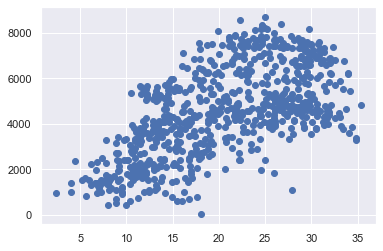

In [39]:
plt.scatter('temp','count',data=bike)

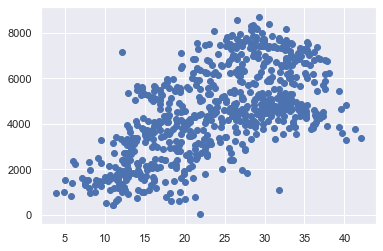

In [40]:
plt.scatter('atemp','count',data=bike)

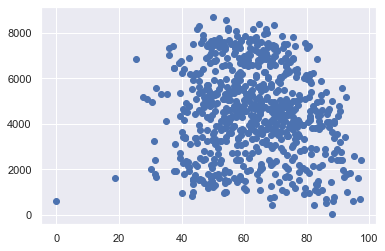

In [41]:
plt.scatter('humidity','count',data=bike)

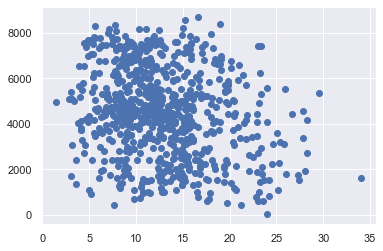

In [42]:
plt.scatter('windspeed','count',data=bike)

<AxesSubplot:xlabel='count', ylabel='Density'>

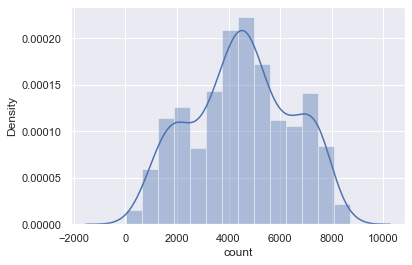

In [43]:
sns.distplot(bike['count'])

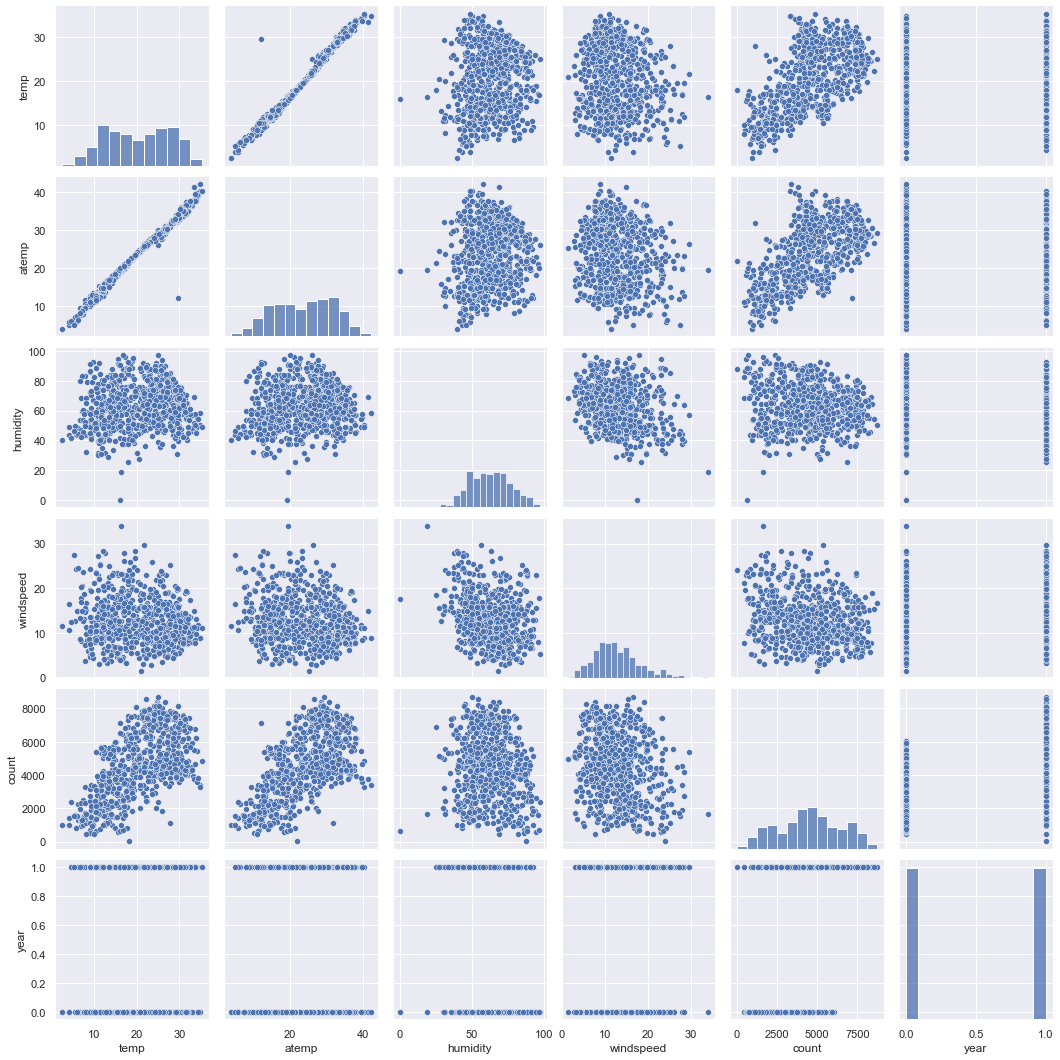

In [44]:
sns.pairplot(bike)

<AxesSubplot:>

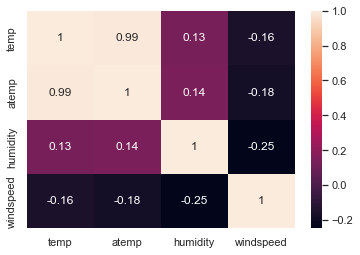

In [45]:
data= bike[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

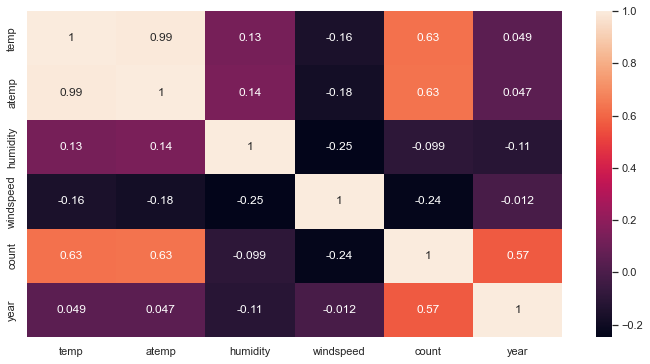

In [46]:
plt.figure(figsize = (12,6))
sns.heatmap(bike.corr(),annot=True)

In [47]:
bike.drop('atemp',axis=1,inplace=True)

In [48]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


In [49]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [50]:
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)

In [51]:
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_day,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_day,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0


In [52]:
bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [53]:
bike.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [56]:
num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

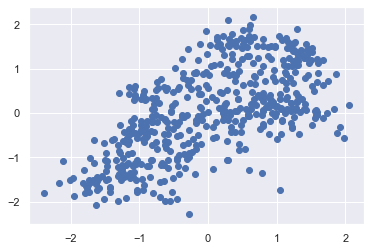

In [58]:
plt.scatter('temp','count',data=df_train)

In [59]:
y_train = df_train.pop('count')
X_train = df_train

In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm)              # running RFE
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 7),
 ('windspeed', False, 5),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 9),
 ('Wed', False, 8)]

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'winter', 'working_day', 'Light Snow', 'Mist',
       'Dec', 'July', 'Nov', 'Sep', 'Mon', 'Sun'],
      dtype='object')

In [78]:
X_train_rfe = X_train[col]

In [79]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [80]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          2.80e-178
Time:                        20:56:00   Log-Likelihood:                -278.94
No. Observations:                 510   AIC:                             585.9
Df Residuals:                     496   BIC:                             645.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6753      0.136     -4.950      0.000      -0.943      -0.407
temp            0.4540      0.032     14.061      0.000       0.391       0.517
year            1.0408      0.038     27.443      0.000       0.966       1.115
spring         -0.5161      0.070     -7.340      0.000      -0.654      -0.378
winter          0.3348      0.065      5.126      0.000       0.206       0.463
working_day     0.3707      0.131      2.831      0.005       0.113       0.628
Light Snow     -1.3590      0.114    -11.941      0.000      -1.583      -1.135
Mist           -0.3634      0.041     -8.963      0.000      -0.443      -0.284
Dec            -0.1491      0.079     -1.895      0.059      -0.304       0.006
July           -0.2969      0.080     -3.706      0.000      -0.454      -0.140
Nov            -0.2189      0.086     -2.533      0.012      -0.389      -0.049
Sep             0.2699      0.073      3.713      0.000       0.127       0.413
Mon             0.4648      0.139      3.348      0.001       0.192       0.738
Sun             0.4509      0.139      3.240      0.001       0.177       0.724
==============================================================================
Omnibus:                       81.475   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.602
Skew:                          -0.791   Prob(JB):                     9.24e-48
Kurtosis:                       5.773   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_train1= X_train_rfe.drop('Mon',1)

In [83]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [84]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sat, 30 Jul 2022   Prob (F-statistic):          4.93e-177
Time:                        20:57:36   Log-Likelihood:                -284.64
No. Observations:                 510   AIC:                             595.3
Df Residuals:                     497   BIC:                             650.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2694      0.063     -4.267      0.000      -0.393      -0.145
temp            0.4521      0.033     13.861      0.000       0.388       0.516
year            1.0401      0.038     27.148      0.000       0.965       1.115
spring         -0.5318      0.071     -7.503      0.000      -0.671      -0.393
winter          0.3331      0.066      5.050      0.000       0.204       0.463
working_day    -0.0309      0.053     -0.584      0.560      -0.135       0.073
Light Snow     -1.3521      0.115    -11.762      0.000      -1.578      -1.126
Mist           -0.3565      0.041     -8.715      0.000      -0.437      -0.276
Dec            -0.1494      0.080     -1.879      0.061      -0.306       0.007
July           -0.2880      0.081     -3.560      0.000      -0.447      -0.129
Nov            -0.2389      0.087     -2.744      0.006      -0.410      -0.068
Sep             0.2541      0.073      3.467      0.001       0.110       0.398
Sun             0.0493      0.071      0.692      0.490      -0.091       0.189
==============================================================================
Omnibus:                       81.088   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.528
Skew:                          -0.779   Prob(JB):                     7.87e-49
Kurtosis:                       5.828   Cond. No.                         9.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_train_new= X_train2.drop('const',axis=1)

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,2.80
2,spring,2.78
0,temp,2.75
4,working_day,2.67
1,year,1.87
9,Nov,1.81
7,Dec,1.46
6,Mist,1.45
8,July,1.37
11,Sun,1.33


# Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature

In [87]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

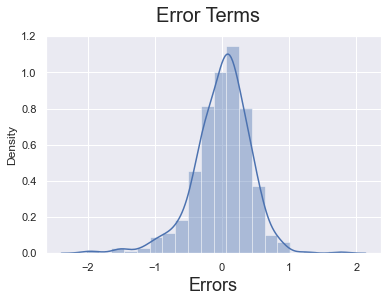

In [88]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [89]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [90]:
y_test = df_test.pop('count')
X_test = df_test

In [91]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
y_test_pred = lm1.predict(X_test_new)

Text(0, 0.5, 'Predictions')

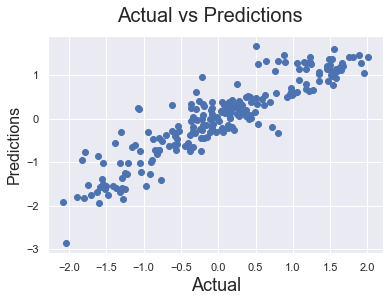

In [93]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8212161054240393